# **Partie 1**

<Figure size 432x288 with 0 Axes>

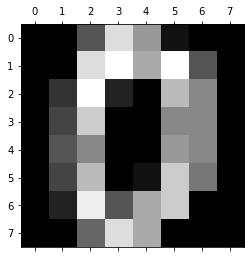

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = load_digits()

plt.gray()
plt.matshow(digits.images[0])
plt.show()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Partie 2**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

range1 = range(50, 200, 25)
train_score = []
test_score = []

for n in range1:
    clf1 = MLPClassifier(hidden_layer_sizes=n, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0)

    clf1.fit(X_train, y_train)

    train_score.append(clf1.score(X_train, y_train))
    test_score.append(clf1.score(X_test, y_test))

plt.plot(range1, train_score,label="train",color="red")
plt.plot(range1, test_score,label="test",color="blue")
plt.xlabel('number of neuron in layer')
plt.ylabel('score')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# **Partie 3**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import numpy as np

C = np.array([1,2,3,4,5,8,10,15,20,25,30,35,40])

train_scores, validation_scores = validation_curve(
        MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2), 
        X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)

# Diviser la base d'apprentissage en deux sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Définir les paramètres pour l'apprentissage avec early stopping
clf2 = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1, early_stopping=True, validation_fraction=0.2)

# Entraîner le réseau de neurones et faire varier le nombre de neurones cachés
range2 = range(50, 200, 25)
train_scores = []
val_scores = []

for n in range2:
    clf2.hidden_layer_sizes = (n,)
    clf2.fit(X_train, y_train)
    train_score = clf2.score(X_train, y_train)
    val_score = clf2.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

Iteration 1, loss = 1.21327409
Validation score: 0.791045
Iteration 2, loss = 0.53147929
Validation score: 0.791045
Iteration 3, loss = 0.44949430
Validation score: 0.825871
Iteration 4, loss = 0.33109016
Validation score: 0.875622
Iteration 5, loss = 0.25996224
Validation score: 0.870647
Iteration 6, loss = 0.33242554
Validation score: 0.895522
Iteration 7, loss = 0.29484035
Validation score: 0.771144
Iteration 8, loss = 0.34740680
Validation score: 0.890547
Iteration 9, loss = 0.31457215
Validation score: 0.860697
Iteration 10, loss = 0.32740732
Validation score: 0.900498
Iteration 11, loss = 0.23808982
Validation score: 0.870647
Iteration 12, loss = 0.19010858
Validation score: 0.910448
Iteration 13, loss = 0.29753891
Validation score: 0.925373
Iteration 14, loss = 0.36166414
Validation score: 0.840796
Iteration 15, loss = 0.29558874
Validation score: 0.905473
Iteration 16, loss = 0.23791145
Validation score: 0.905473
Iteration 17, loss = 0.26977530
Validation score: 0.930348
Iterat

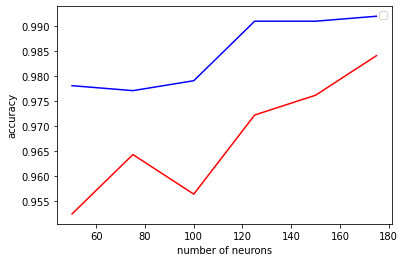

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range2, train_scores, color='blue')
plt.plot(range2, val_scores, color='red')
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# **Partie 4**

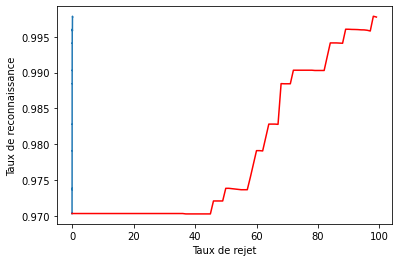

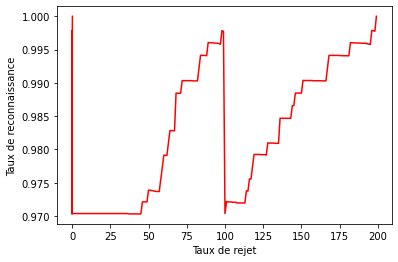

In [ ]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

# clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)
# clf.fit(X_train, y_train)

y_proba = clf1.predict_proba(X_test)

rejet_rates = []
recognition_rates = []

#argmax_reject_threshold
for threshold in np.arange(0, 1, 0.01):
    y_pred = argmax_reject_threshold(y_proba, threshold)
    rejet_rate = np.sum(y_pred == -1) / len(y_pred)
    correct_pred_mask = y_pred != -1
    recognition_rate = np.sum(y_pred[correct_pred_mask] == y_test[correct_pred_mask]) / np.sum(correct_pred_mask)
    rejet_rates.append(rejet_rate)
    recognition_rates.append(recognition_rate)

plt.plot(rejet_rates, recognition_rates)
plt.plot(recognition_rates, color='red')
plt.xlabel("Taux de rejet")
plt.ylabel("Taux de reconnaissance")
plt.show()

#argmax_top2_reject_threshold
for threshold in np.arange(0, 1, 0.01):
    y_pred = argmax_top2_reject_threshold(y_proba, threshold)
    rejet_rate = np.sum(y_pred == -1) / len(y_pred)
    correct_pred_mask = y_pred != -1
    recognition_rate = np.sum(y_pred[correct_pred_mask] == y_test[correct_pred_mask]) / np.sum(correct_pred_mask)
    rejet_rates.append(rejet_rate)
    recognition_rates.append(recognition_rate)

plt.plot(rejet_rates, recognition_rates,color='red')
plt.plot(recognition_rates, color='red')
plt.xlabel("Taux de rejet")
plt.ylabel("Taux de reconnaissance")
plt.show()